In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
# 데이터 불러오기
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare = raw_welfare.copy()

In [8]:
# 변수명 바꾸기
welfare = welfare.rename(
    columns = {'h14_g3'    : 'sex',           # 성별
               'h14_g4'    : 'birth',         # 태어난 연도
               'h14_g10'   : 'marriage_type', # 혼인 상태
               'h14_g11'   : 'religion',      # 종교
               'p1402_8aq1': 'income',        # 월급
               'h14_eco9'  : 'code_job',      # 직업 코드
               'h14_reg7'  : 'code_region'})  # 지역 코드

## 연령대 변수 검토 및 전처리하기

In [14]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)  # 나이 변수 만들기

In [16]:
# 나이 변수 살펴보기
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [20]:
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59, 'middle', 'old')))
# 빈도 구하기
welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

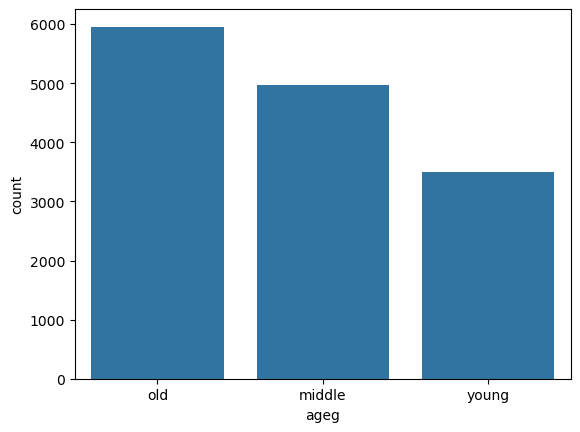

In [22]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'ageg')

## 연령대에 따른 월급 차이 분석하기

In [25]:
# 연령대별 월급 평균표 만들기
# income 결측치 제거
# ageg별 분리
# income 평균 구하기
ageg_income = welfare.dropna(subset = 'income')\
                     .groupby('ageg', as_index = False)\
                     .agg(mean_income = ('income', 'mean'))

<Axes: xlabel='ageg', ylabel='mean_income'>

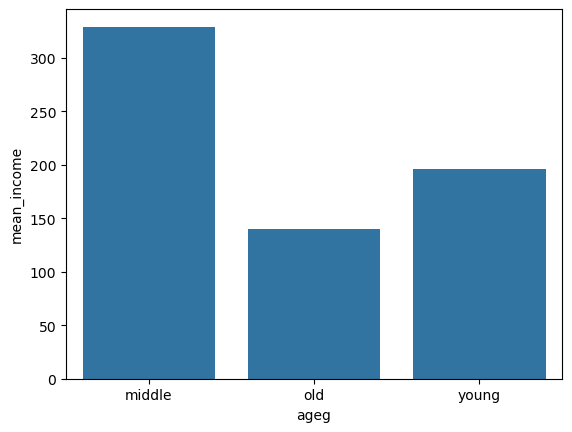

In [27]:
# 막대 그래프 만들기
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

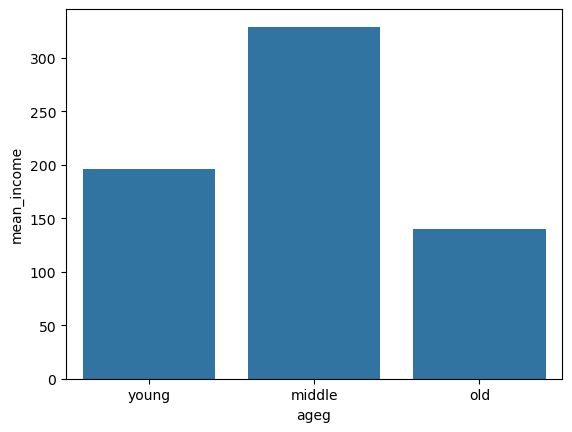

In [29]:
# 막대 정렬하기
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
            order = ['young', 'middle', 'old'])